# Продвинутое машинное обучение: ДЗ 1

**Стариков Андрей**  
группа MADE-ML-22

In [1]:
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
from scipy.stats._multivariate import multivariate_normal_gen
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, MonthLocator, DateFormatter, DayLocator
from datetime import timedelta
from adjustText import adjust_text

%matplotlib inline
xtick_locator = AutoDateLocator(interval_multiples=False)
xtick_formatter = AutoDateFormatter(xtick_locator)

rc('font',**{'family':'sans-serif'})
rc('figure', **{'dpi': 96})
rc('text', usetex=False)

## Часть I: О теореме Байеса

### 1.1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

***Решение***

Так как редкая группа крови находится лишь у 1% населения, то вероятность того, что у преступника могла оказаться редкая группа крови равна 1%. Именно эту вероятность и оценил прокурор, то есть вероятность того, что на месте преступления могла оказаться редкая группа крови.

**Как должны была оцениваться вероятность**

Обозначим событие, когда у убийцы оказывается редкая группа крови &mdash; $A$

Обозначим $B$ &mdash; событие убийства.

$P(A|B) = 1$ &mdash; дано по условию.

Обозначим $B_1$ &mdash; событие, когда подсудимый является убийцей и $B_2$, если невиновен. При этом $P(B_2) = 1 - P(B_1)$

Вероятность того, что подсудимый является преступником, в таком случае, станет
$$
P(B_1|A) = \frac{P(A|B_1) P(B_1)}{P(A)} = \frac{P(A|B_1) P(B_1)}{P(A|B_1) P(B_1) + P(A|B_2) P(B_2)} = \frac{P(B_1)}{P(B_1) + 1 - P(B_1)} = P(B_1)
$$

Но именно вероятность $P(B_1)$ (подозреваемый является убийцей) нам неизвестна.

### 1.2

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

***Решение***

Адвокат оценил вероятность того, что из всех жителей города, имеющих редкую группу крови, подсудимый является убийцей.

Однако если учесть дополнитеные вероятности того, что не все из оставшихся жителей с той же группой крови имели возможность совершения преступления (младенцы, инвалиды, находились в другом месте и т.п.), а также если учитывать возможные другие улики против подозреваемого, то вероятность $P(B_1)$ возрастает и, как следствие, возрастает $P(B_1|A)$.

### 1.3
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

***Решение***

Запишем вероятность того, что полученный положительный тест соответствует фактически заболевшему распонденту:
$$P(d=1 | t=1) = \frac {P(t=1 | d=1) P(d=1)} {P(t=1 | d=1) P(d=1) + P(t=1 | d=0) P(d=0)}$$

$P(d=1 | t=1)$ &mdash; вероятность того, что положительный тест (t=1) соответствует фактическому заболеванию (d=1)  
$P(t=1 | d=1)$ &mdash; вероятность того, что у заболевшего человека тест будет положителен (true positives)  
$P(t=1 | d=0)$ &mdash; вероятность того, что у здорового человека тест будет положителен (false positives)  

Требуется определить на что направить дальнейшие усилия:
 - на снижение false positives
 - на снижение false negatives

##### 1. Рассмотрим графическую зависимость апостериорной вероятности от false positives.
Базовое значение прогнозной ошибки 5%.  
Построим график зависимости на диапазоне 0 - 10% (поскольку рассматривается снижение вероятности данной ошибки)

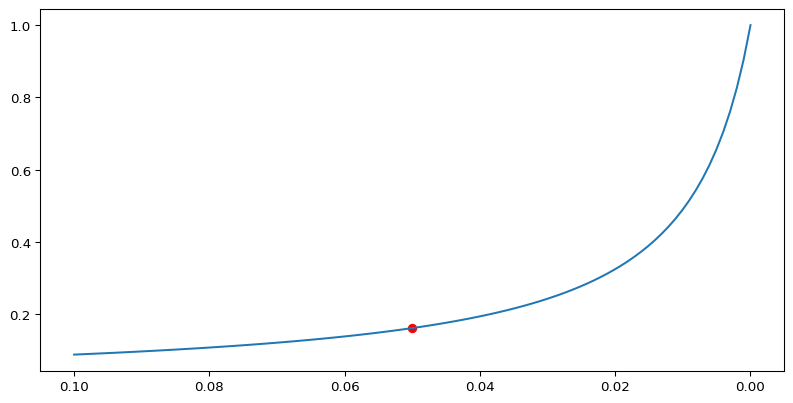

In [2]:
x = np.linspace(0., 0.1, num=100)
fp = lambda x: 0.95 * 0.01 / (0.95 * 0.01 + x * 0.99)

plt.figure(figsize=(10, 5), dpi=96)
plt.plot(x, fp(x))
plt.scatter(0.05, fp(0.05), color='red')

plt.gca().invert_xaxis()

plt.show()

На графике наглядно видно, что в случае снижения показателя **false positives** растет вероятность того, что положительный результат теста действительно свидетельствует о наличии болезни.

##### 2. Рассмотрим графическую зависимость апостериорной вероятности от false negatives.
Базовое значение прогнозной ошибки 5%.  
Построим график зависимости на диапазоне 0 - 10% (поскольку рассматривается снижение вероятности данной ошибки)

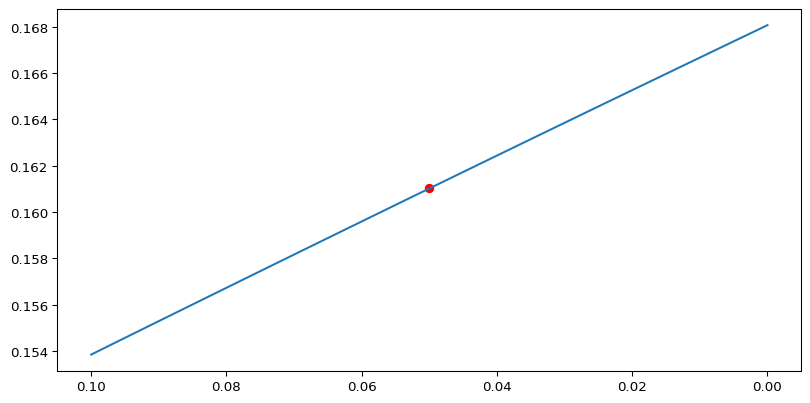

In [3]:
x = np.linspace(0., 0.1, num=100)
fn = lambda x: (1 - x) * 0.01 / ((1 - x) * 0.01 + 0.05 * 0.99)

plt.figure(figsize=(10, 5), dpi=96)
plt.plot(x, fn(x))
plt.scatter(0.05, fp(0.05), color='red')

plt.gca().invert_xaxis()

plt.show()

На графике наглядно видно, что в случае снижения показателя **false negatives** вероятность того, что положительный результат теста действительно свидетельствует о наличии болезни, вырастает совсем незначительно.

Оценим результат текущей точности, например на выборке в 100 000 человек.

Ложноположительный результат в 5%, для группы из 99 000 человек, дает дополнительную нагрузку на больничный фонд в 4 950 человек.  
Ложноотрицательный результат в 5%, для группы из 1 000 человек, дает пропуск в 50 человек.

Допустим, на удалось снизить ложноположительный и ложноотрицательные результаты до 0.1%

В таком случае:  
- при ложноположительном результате, снижение нагрузки на больничный фонд в составит 4 851 человек (99 ложноположительных).  
- при ложноотрицательном результате, пропуск сократится на 49 человек (до 1).

Если уровень контагиозности будет 1:5 и инкубационный период будет длиться неделю. То невыявленные 49 случаев приведут к новым 245 случаям.

При этом снижение ложноположительного результата до уровня 0,1% повышает общий уровень доверия к тесту до 90,5%.

Поэтому рекомендации следующие:
 - снижать ложноположительный результат до уровня не менее 0,1%
 - проводить с регулярностью не ниже инкубационного периода тотальное тестирование населения

## Часть II: О линейной регрессии

### 1.
Скачайте [данные](https://ourworldindata.org/coronavirus-source-data) в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [4]:
source_df = pd.read_csv('owid-covid-data.csv', 
                        parse_dates=['date'],
                        usecols=['date', 'location', 'new_cases', 'total_cases', ])

source_df.loc[source_df['new_cases'] <= 0, 'new_cases'] = 1

source_df.new_cases.fillna(1., inplace=True)

source_df.sort_values(by='date', inplace=True)

df = source_df.query("location == 'Russia' and date >= '2020-03-03'").drop(columns=['location']).reset_index(drop=True)
print('Total values:', df.shape[0])
df.head(5)

Total values: 347


,date,total_cases,new_cases
0,2020-03-03,3.0,1.0
1,2020-03-04,3.0,1.0
2,2020-03-05,4.0,1.0
3,2020-03-06,13.0,9.0
4,2020-03-07,13.0,1.0


In [5]:
# Создаем набор для трейна и теста
days = 50

X_train = np.arange(days)
X_train_date = df[:days]['date']
y_train = df[:days][['total_cases', 'new_cases']]
X_test = np.arange(days, df.shape[0])
X_test_date = df[days:]['date']
y_test = df[days:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50,) (50, 2) (297,) (297, 3)


### 2.
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

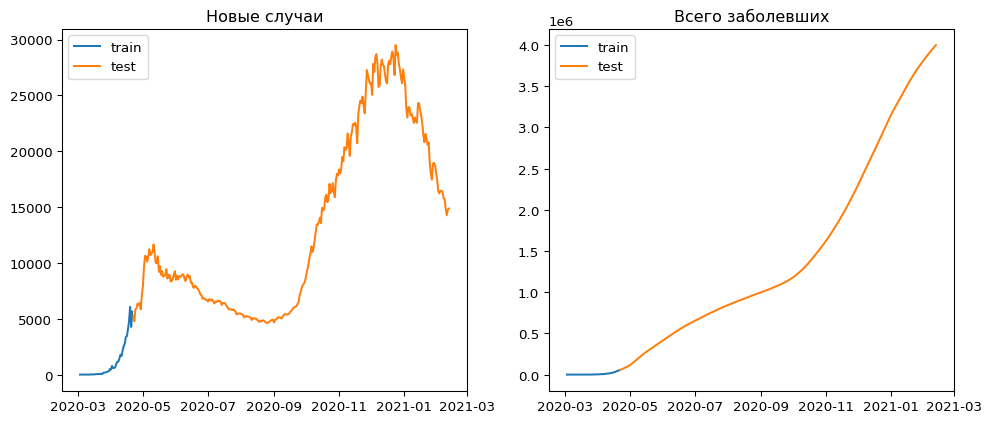

In [6]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(X_train_date, y_train['new_cases'].values, label='train')
ax1.plot(X_test_date, y_test['new_cases'].values, label='test')
ax1.set_title('Новые случаи')
ax1.legend()

ax2.plot(X_train_date, y_train['total_cases'].values, label='train')
ax2.plot(X_test_date, y_test['total_cases'].values, label='test')
ax2.set_title('Всего заболевших')
ax2.legend()

plt.show()

### 2.a
Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.


In [7]:
y_train_ln = np.log(y_train['total_cases'].values).reshape(-1, 1)
y_test_ln = np.log(y_test['total_cases'].values).reshape(-1, 1)

total_cases_lr = LinearRegression(fit_intercept=True).fit(X_train.reshape(-1, 1), y_train_ln)

pred_train = total_cases_lr.predict(X_train.reshape(-1, 1))
pred_test = total_cases_lr.predict(X_test.reshape(-1, 1))

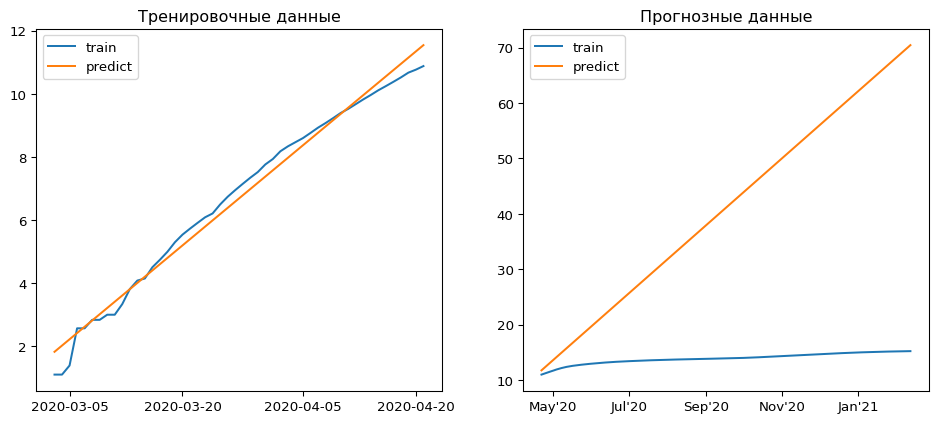

In [8]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(X_train_date, y_train_ln, label='train')
ax1.plot(X_train_date, pred_train, label='predict')
ax1.set_title('Тренировочные данные')
ax1.legend()

ax1.xaxis.set_major_locator(DayLocator(bymonthday=[5,20]))
ax2.xaxis.set_major_formatter(xtick_formatter)

ax2.plot(X_test_date, y_test_ln, label='train')
ax2.plot(X_test_date, pred_test, label='predict')
ax2.set_title('Прогнозные данные')
ax2.legend()

ax2.xaxis.set_major_locator(MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(DateFormatter("%b'%y"))

plt.show()

### 2.b
Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [9]:
w0 = total_cases_lr.intercept_[0]
w1 = total_cases_lr.coef_[0][0]

noise_sigma = (y_train_ln - pred_train).std()

print(f"Параметры априорного распределения: смещение={w0:.4f}, наклон={w1:.4f}, дисперсия шума={noise_sigma:.4f}")

Параметры априорного распределения: смещение=1.8207, наклон=0.1983, дисперсия шума=0.3490


In [10]:
N = 2_500
X = np.linspace(0, 2.5, N)
Y = np.linspace(0, 2.5, N)

X, Y = np.meshgrid(X, Y)

true_mu = [w0, w1]
data = y_train_ln.flatten()
xd = X_train

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

cur_mu, cur_sigma = np.array([0, 0]), 2 * np.eye(2)

def myplot_heatmap(Z, xlim=(0,2), ylim=(0,2)):
    plt.axis('equal')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet, shading='auto')
    plt.scatter(true_mu[0], true_mu[1], marker='*', s=120, color='w')

def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    if type(x) is np.int64:
        x_matrix = np.array([[1, x]])
    else:
        x_matrix = np.c_[np.ones(len(x)), x]
        
    if type(y) is np.float64:
        y_matrix = np.array([y])
    else:
        y_matrix = y
    
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) \
                            * np.matmul(x_matrix.T, x_matrix) )

    mu_n = np.matmul(sigma_n, 
                     np.matmul(np.linalg.inv(sigma),
                               np.transpose(mu)) + (1 / (sigma_noise ** 2)) \
                                * np.matmul(x_matrix.T, y_matrix ) )

    return mu_n, sigma_n

cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, xd, data, noise_sigma)

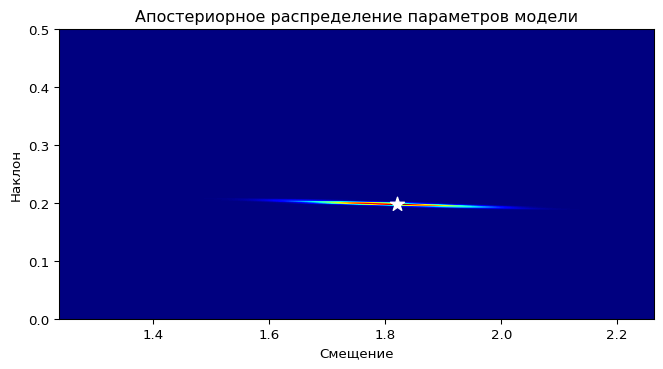

In [11]:
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

xlim = tuple([1.5, 2.0])
ylim = tuple([0.0, 0.5])

plt.title('Апостериорное распределение параметров модели')
plt.xlabel('Смещение')
plt.ylabel('Наклон')

myplot_heatmap(Z, xlim, ylim)

In [12]:
print (f"Параметры апостериорного распределения: смещение={cur_mu[0]:.4f}, наклон={cur_mu[1]:.4f}")

Параметры апостериорного распределения: смещение=1.8122, наклон=0.1985


### 2.c
Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

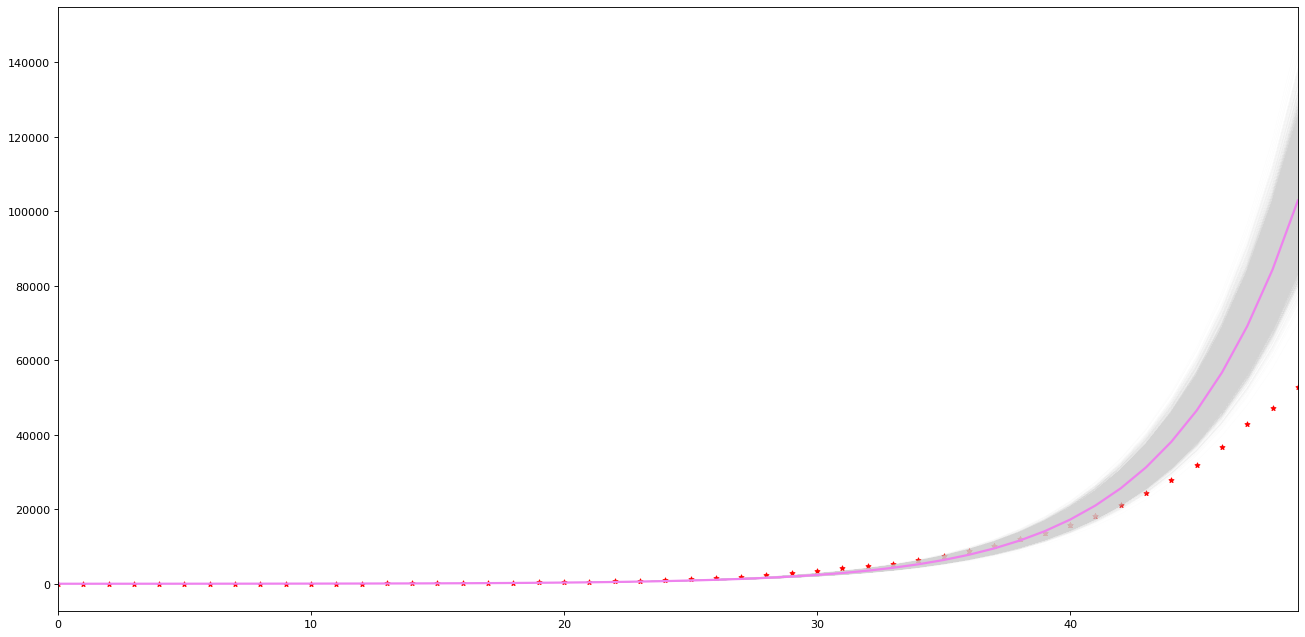

Семплированные экспоненты дали следующие параметры: смещение=1.8118, наклон=0.1986


In [13]:
def myplot_sample_lines_exp(mu, sigma, xd, n=10_000, points=None, plot_samples=True):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    
    avg_w0 = my_w[:, 0].mean()
    avg_w1 = my_w[:, 1].mean()
    
    fig = plt.figure(figsize=(20, 10), dpi=80)
    
    predicts = np.apply_along_axis(lambda w: np.exp(w[0] + w[1] * xd), 1, my_w)

    if plot_samples:
        plt.plot(xd, predicts.T, 'k-', lw=.02, color='lightgray')
        
    if not points is None:
        plt.scatter(points[0], np.exp(points[1]), marker='*', s=20, color='red')

    plt.xlim((0, 49))

    plt.plot(xd, np.exp(avg_w0 + avg_w1 * xd), color='violet', linewidth=2)
    plt.show()
    
    return (avg_w0, avg_w1)
    
w = myplot_sample_lines_exp(cur_mu, cur_sigma, xd, points=[xd, data], plot_samples=True)

print(f"Семплированные экспоненты дали следующие параметры: смещение={w[0]:.4f}, наклон={w[1]:.4f}")

Отобразим предсказательные распределения:

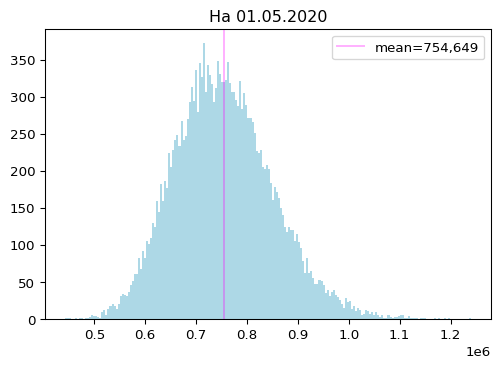

Прогноз по состоянию на 01.05.2020: 754,649 заразившихся, фактическое значение - 114,431


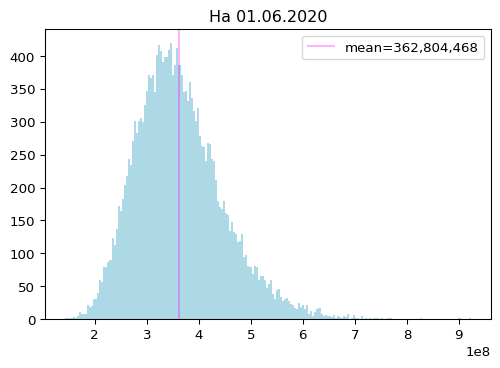

Прогноз по состоянию на 01.06.2020: 362,804,468 заразившихся, фактическое значение - 414,328


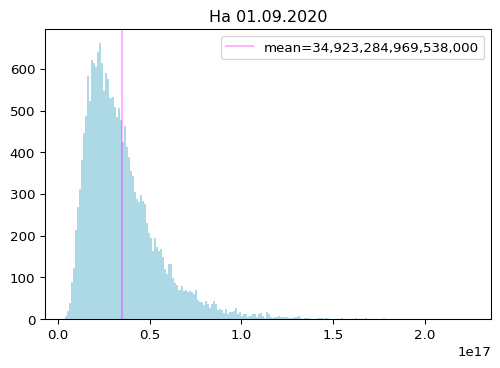

Прогноз по состоянию на 01.09.2020: 34,923,284,969,538,000 заразившихся, фактическое значение - 997,072


In [14]:
dates = ['2020-05-01', '2020-06-01', '2020-09-01']
date_0 = pd.to_datetime('2020-03-03')

def sample_exp_date(mu, sigma, days=50, n=20000):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    return np.exp(my_w[:, 0] + my_w[:, 1] * days)

for date_str in dates:
    date = pd.to_datetime(date_str)
    predict = sample_exp_date(cur_mu, cur_sigma, days=(date - date_0).days)
    plt.hist(predict, bins=200, color='lightblue')
    plt.axvline(predict.mean(), color='magenta', alpha=0.3, label=f"mean={predict.mean():,.0f}")
    plt.title(f"На {date.strftime('%d.%m.%Y')}")
    plt.legend()
    plt.show()
    print(f"Прогноз по состоянию на {date.strftime('%d.%m.%Y')}:",
          f"{predict.mean():,.0f} заразившихся,", 
          f"фактическое значение - {df[df.date == date].total_cases.values[0]:,.0f}")    

**Вывод:** экпоненциальный прогноз, к счастью, не сбылся.

### 3

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:
$$\large{\Phi(x) = \frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{x}{\large{e^{\frac{-t^2}{2}}}dt}}$$  
Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

### 3.a
Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

Поскольку нам предоставлено право внести константу в экспоненту и под интегралом использовать любую произвольную квадратичную функцию, то мы возьмем в качестве формы распределения сигмоиды следующую функцию:
$$\large{\Phi(x) = \int_{-\infty}^{x}{\large{e^{a t^2 + b t + c}}dt}}$$  

Нам даны значения `total_cases` и `new_cases`, где `new_cases` мы можем воспринимать как производную. Взяв производную от нашей функции мы получим следующее:
$$f(x) = \frac{1}{\sqrt{2 \pi}}\large{e^{at^2 + bt + c}}$$

Прологарифмировав такую производную мы получим
$$\ln{f(x)} = at^2 + bt + c$$

Значения для обучения у нас уже лежат в поле `new_cases`, необходимо только взять от них логарифм, тем же способом, как мы получили `y_train_ln` в п. 2.а.

Итоговый ответ мы получим сложив все предсказанные значения `new_cases`.

### 3.b
Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

Коэффициенты w0, w1, w2: -0.39659040284162383, 0.2756228319027641, -0.0018297906166869166


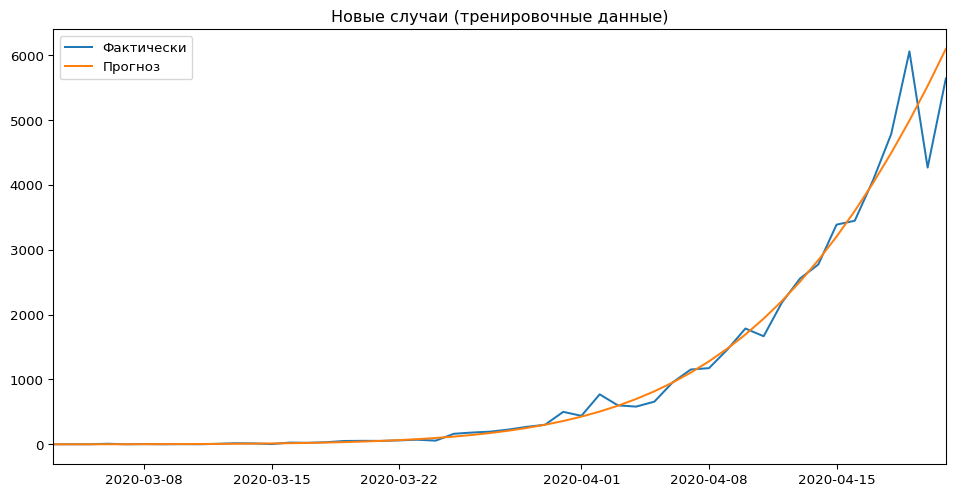

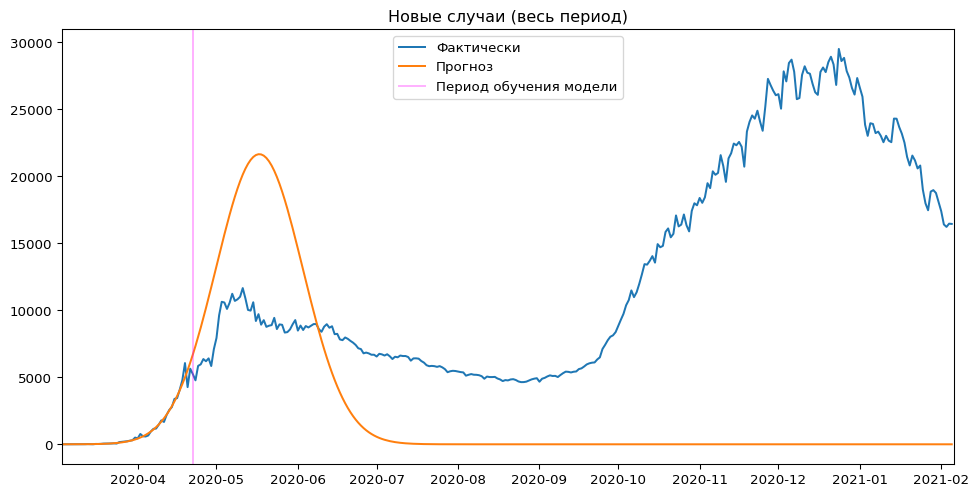

In [15]:
days_full = 185
min_date = df[:1]['date'].values[0]
X_long = np.hstack((np.arange(days).reshape(-1, 1), np.arange(days).reshape(-1, 1) ** 2))

new_cases_lr = LinearRegression().fit(X_long, np.log(df[:days]['new_cases'].values.flatten()))

print('Коэффициенты w0, w1, w2:', ", ".join(map(str, (new_cases_lr.intercept_, *new_cases_lr.coef_))))

days_max = 340
X_full = np.hstack((np.arange(days_max).reshape(-1, 1), np.arange(days_max).reshape(-1, 1) ** 2))
pred_full = np.exp(new_cases_lr.predict(X_full))

date = df[:days_max]['date'].values.flatten()

plt.figure(figsize=(12, 6))

plt.plot(date[:days], df[:days]['new_cases'].values.flatten(), label='Фактически')
plt.plot(date[:days], pred_full[:days], label='Прогноз')

plt.xlim((min_date, df[days-1:days]['date'].values[0]))

plt.title('Новые случаи (тренировочные данные)')
plt.legend()

plt.show()

plt.figure(figsize=(12, 6))

plt.plot(date, df[:days_max]['new_cases'].values.flatten(), label='Фактически')
plt.plot(date, pred_full[:days_max], label='Прогноз')

plt.axvline(df[days:days+1]['date'].values[0], color='magenta', alpha=0.3, label='Период обучения модели')

plt.xlim((min_date, df[days_max:days_max+1]['date'].values[0]))

plt.title('Новые случаи (весь период)')
plt.legend()

plt.show()

Мы видим, что наш прогноз с одной стороны лучше, чем экспоненциальная функция, но имеет тоже достаточно ограниченную точность предсказания.

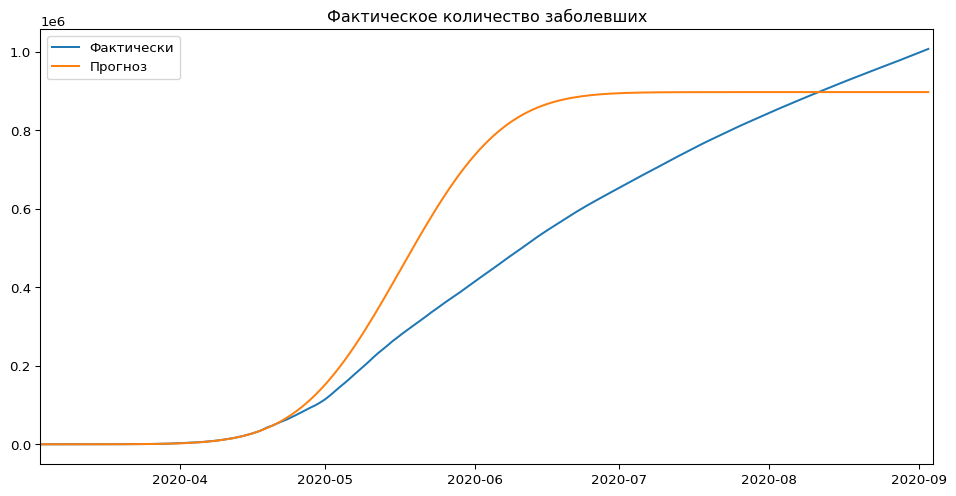

In [16]:
X_full = np.c_[np.arange(days_full), np.arange(days_full)**2]
pred_full = np.exp(new_cases_lr.predict(X_full))

date = df[:days_full]['date'].values.flatten()

pred_full = np.cumsum(np.exp(new_cases_lr.predict(X_full)))

plt.figure(figsize=(12, 6))

plt.plot(date, df[:days_full]['total_cases'].values, label='Фактически')
plt.plot(date, pred_full, label='Прогноз')

plt.gca().xaxis.set_major_locator(xtick_locator)
plt.gca().xaxis.set_major_formatter(xtick_formatter)

plt.xlim((min_date, df[days_full:days_full+1]['date'].values[0]))

plt.title('Фактическое количество заболевших')
plt.legend()

plt.show()

In [17]:
prior_mu, prior_sigma = np.zeros(3), np.eye(3) * 3

days=50

X = np.c_[np.arange(days), np.arange(days)**2]
y = np.log(df[:days]['new_cases'])

y_pred = new_cases_lr.predict(X)
new_cases_std = (y - y_pred).std()

prior_dist = multivariate_normal(mean=prior_mu, cov=prior_sigma)
new_cases_mu_posterior, new_cases_cov_posterior = bayesian_update(prior_mu, prior_sigma, X, y, new_cases_std)
new_cases_posterior = multivariate_normal(mean=new_cases_mu_posterior, cov=new_cases_cov_posterior)

print(f"""Априорное стандартное отклонение: {
    new_cases_std:.3f}, постериорные коэффициенты (w0, w1, w2): {
        ', '.join(map('{:.4f}'.format, new_cases_mu_posterior))}""")

Априорное стандартное отклонение: 0.494, постериорные коэффициенты (w0, w1, w2): -0.3910, 0.2752, -0.0018


### 3.c
Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

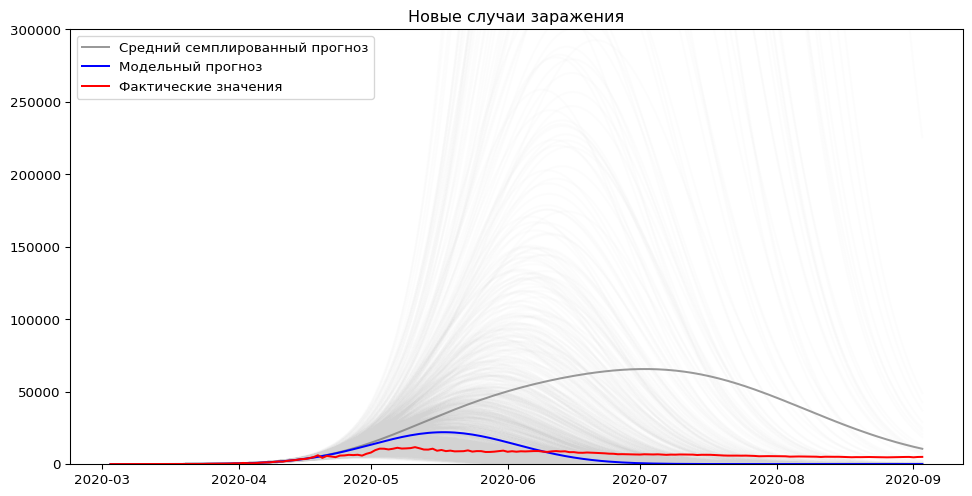

Прогнозное значение выявления новых случаев заболевших: 10,546


In [18]:
plt.figure(figsize=(12, 6))
X = np.c_[np.arange(days_full), np.arange(days_full)**2]
y = np.log(df[:days]['new_cases'].values.flatten())

my_w = new_cases_posterior.rvs(1_000)
predicts = np.apply_along_axis(lambda w: np.exp(w[0] + w[1] * X[:, 0] + w[2] * X[:, 1]), 1, my_w)
plt.plot(date, predicts.T, color='lightgray', alpha=0.05)

plt.plot(date, predicts.mean(axis=0), color='gray', alpha=0.8, label='Средний семплированный прогноз')

plt.plot(date, 
         np.exp(new_cases_mu_posterior[0] + new_cases_mu_posterior[1] * X[:, 0] + new_cases_mu_posterior[2] * X[:, 1]),
         color='blue', label='Модельный прогноз')

plt.plot(date, df[:days_full]['new_cases'].values, color='red', label='Фактические значения')

plt.gca().xaxis.set_major_locator(xtick_locator)
plt.gca().xaxis.set_major_formatter(xtick_formatter)

plt.ylim((0, 3e5))


plt.title('Новые случаи заражения')

plt.legend()

plt.show()

print(f'Прогнозное значение выявления новых случаев заболевших: {predicts[:,-1].mean():,.0f}')

Сделаем прогноз на 01.05.2020г

In [19]:
def plot_sample_sigmoids(dist: multivariate_normal_gen,
                         x_max=100, y_max=3e6,
                         n=10_000,
                         n_params=5, min_date=min_date, plot=True):

    fig, ax = None, None
    
    if plot:
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(111)
        ax.xaxis.set_major_locator(xtick_locator)
        ax.xaxis.set_major_formatter(xtick_formatter)
    
    X = np.c_[np.arange(0, x_max), np.arange(0, x_max)**2]
    dates = [min_date]
    for _ in range(x_max - 1):
        min_date += np.timedelta64(1,'D')
        dates.append(min_date)
  
    w = dist.rvs(n)
    y_values = np.apply_along_axis(lambda w: np.cumsum(np.exp(w[0] + w[1] * X[:, 0] + w[2] * X[:, 1])), 1, my_w)
    pred_values = y_values[:, -1]

    if plot:
        ax.plot(dates, y_values.T, 'k-', lw=0.2, alpha=0.05, color='lightgray')

    mean, std = np.mean(y_values, axis=0), np.std(y_values, axis=0)
    
    if plot:
        ax.plot(dates, mean, alpha=0.9, label='Среднее предсказание', color='blue')
        plt.ylim((0, y_max))
        plt.xlim((dates[0], dates[-1]))

    return fig, ax, pred_values

date = df['date'].values.flatten()

Фактическое значение - 114,431
Ожидаемое (медиана по предсказаниям) число заболевших: 141,655
Оптимистичная оценка (10-й процентиль): 103,755
Пессимистичная оценка (90-й процентиль): 188,401


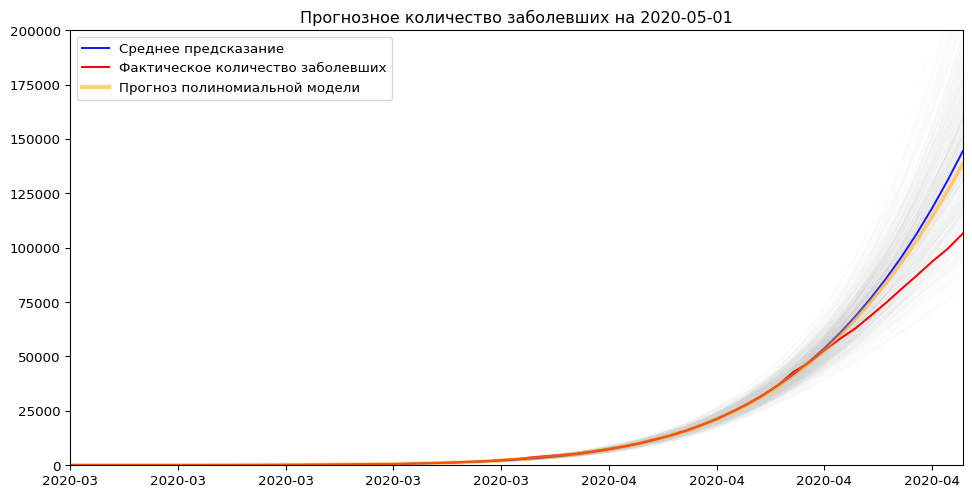

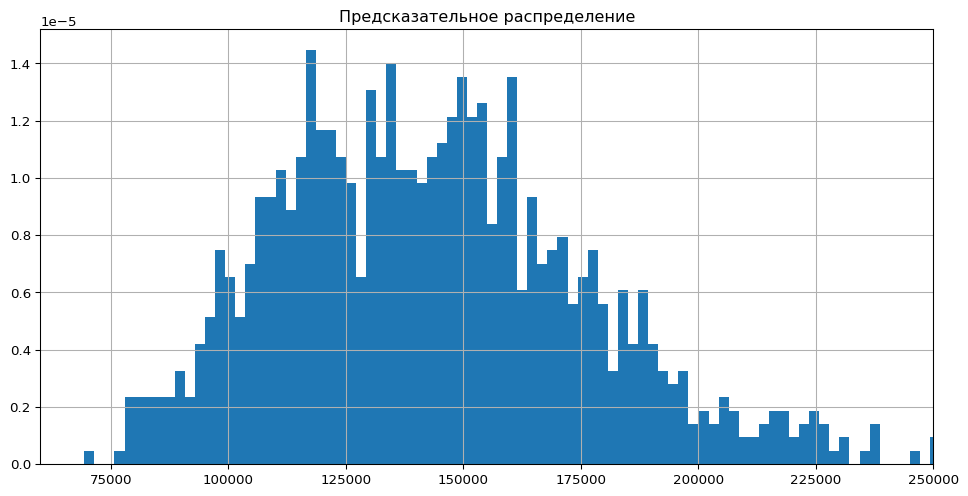

In [20]:
to_date = pd.to_datetime(dates[0])
days = (to_date - date_0).days

fig, ax, pred_values = plot_sample_sigmoids(new_cases_posterior, x_max=days, y_max=2e5)
plt.plot(date[:days], df[:days]['total_cases'].values, label='Фактическое количество заболевших', color='red')
plt.plot(date[:days], pred_full[:days], label='Прогноз полиномиальной модели', lw=3, color='orange', alpha=0.5)
plt.xlim((min_date, df[days - 1 : days]['date'].values[0]))
plt.title(f'Прогнозное количество заболевших на {dates[0]}')
plt.legend()


plt.figure(figsize=(12,6))
plt.xlim((60_000, 250_000))
pred_serie = pd.Series(pred_values)
print(f'Фактическое значение - {df[df.date == to_date].total_cases.values[0]:,.0f}')
print(f'Ожидаемое (медиана по предсказаниям) число заболевших: {np.median(pred_serie):,.0f}')
optimistic_value, pessimistic_value = pred_serie.quantile(0.1), pred_serie.quantile(0.9)
print(f'Оптимистичная оценка (10-й процентиль): {optimistic_value:,.0f}')
print(f'Пессимистичная оценка (90-й процентиль): {pessimistic_value:,.0f}')
truncated_pred_values = pred_serie[pred_serie <= 2e6]
truncated_pred_values.hist(density=True, bins=100)
plt.title('Предсказательное распределение')
plt.show()

Посчитаем количество заболевших через год, после начала эпидемии.

Ожидаемое (медиана по предсказаниям) число заболевших: 996,101
Оптимистичная оценка (10-й процентиль): 314,978
Пессимистичная оценка (90-й процентиль): 5,790,174


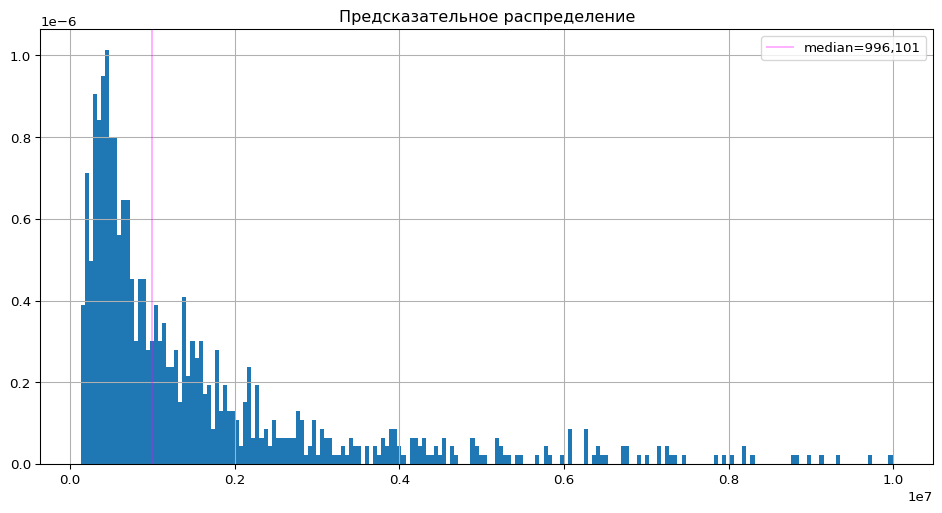

In [21]:
fig, ax, pred_values = plot_sample_sigmoids(new_cases_posterior, x_max=365, n=50_000, plot=False)

plt.figure(figsize=(12,6))
pred_serie = pd.Series(pred_values)
print(f'Ожидаемое (медиана по предсказаниям) число заболевших: {np.median(pred_serie):,.0f}')

optimistic_value, pessimistic_value = pred_serie.quantile(0.1), pred_serie.quantile(0.9)
print(f'Оптимистичная оценка (10-й процентиль): {optimistic_value:,.0f}')
print(f'Пессимистичная оценка (90-й процентиль): {pessimistic_value:,.0f}')
truncated_pred_values = pred_serie[pred_serie <= 1e7]
truncated_pred_values.hist(density=True, bins=200)
plt.title('Предсказательное распределение')

plt.axvline(np.median(pred_serie), color='magenta', alpha=0.3, label=f"median={np.median(pred_serie):,.0f}")
plt.legend()

plt.show()

### 4.
Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

Составим список из 25 стран, отсортированных по количеству зараженных. Датой начала эпидемии будем считать дату, когда начнется устойчивый рост зараженных. Для построения прогноза будем использовать первые 50 дней с начала эпидемии в каждой стране.

In [22]:
locations = {}
for k, v in source_df[
    ~source_df.location.isin(['World', 'Europe', 'North America', 'Asia', 'European Union', 'Africa'])] \
        .groupby('location').agg({'total_cases':[np.max],
                                  'date' : [np.min]}).sort_values(('total_cases', 'amax'),
                                                                  ascending=False)[('date', 'amin')][:25].items():
    country = source_df[source_df.location == k].reset_index(drop=True)
    for i in range(3, 100):
        if country.loc[i - 2].new_cases < country.loc[i - 1].new_cases < country.loc[i].new_cases:
            date_from = country.loc[i - 2].date
            break
    locations.update({k:str(date_from)[:10]})
locations

{'United States': '2020-03-03',
 'South America': '2020-03-02',
 'India': '2020-03-06',
 'Brazil': '2020-03-09',
 'United Kingdom': '2020-02-26',
 'Russia': '2020-03-11',
 'France': '2020-02-24',
 'Spain': '2020-02-24',
 'Italy': '2020-02-20',
 'Turkey': '2020-03-15',
 'Germany': '2020-02-25',
 'Colombia': '2020-03-09',
 'Argentina': '2020-03-18',
 'Mexico': '2020-03-11',
 'Poland': '2020-03-09',
 'Iran': '2020-02-22',
 'South Africa': '2020-03-09',
 'Ukraine': '2020-03-15',
 'Peru': '2020-03-11',
 'Indonesia': '2020-03-07',
 'Czechia': '2020-03-02',
 'Netherlands': '2020-03-03',
 'Canada': '2020-03-04',
 'Portugal': '2020-03-05',
 'Chile': '2020-03-09'}

In [23]:
parameters = []

days = 50

for location, date in locations.items():

    df = source_df[(source_df['location'] == location) & (source_df['date'] >= date)][:days]

    X_train = np.array([np.arange(days), np.arange(days)**2]).T

    y = df['new_cases'].values.flatten()
    for i in range(1, y.shape[0]):
        y[i] = min(y[i], 20. * y[i-1])
    y = np.log(y)

    train_dates = [df['date'].min() + timedelta(days=i) for i in range(df.shape[0])]
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y)

    prior_mu, prior_cov = np.zeros(3), np.eye(3) * 3
    prior_dist = multivariate_normal(mean=prior_mu, cov=prior_cov)

    new_cases_std = (new_cases_lr.predict(X_train) - y).std()

    new_cases_mu_posterior, new_cases_cov_posterior = bayesian_update(prior_mu, prior_cov, X_train, y, new_cases_std)

    parameters.append((location, new_cases_mu_posterior))

    print(f'Страна: {location}, w0: {new_cases_mu_posterior[0]:.4f},',
          f'w1: {new_cases_mu_posterior[1]:.4f}, w2: {new_cases_mu_posterior[2]:.4f}')

Страна: United States, w0: 2.7919, w1: 0.4201, w2: -0.0057
Страна: South America, w0: 0.6008, w1: 0.3717, w2: -0.0045
Страна: India, w0: 0.7242, w1: 0.2353, w2: -0.0020
Страна: Brazil, w0: 1.6767, w1: 0.3027, w2: -0.0036
Страна: United Kingdom, w0: 1.5151, w1: 0.3444, w2: -0.0042
Страна: Russia, w0: 1.3745, w1: 0.2863, w2: -0.0028
Страна: France, w0: 0.8276, w1: 0.3899, w2: -0.0060
Страна: Spain, w0: 0.4241, w1: 0.4256, w2: -0.0054
Страна: Italy, w0: 2.3891, w1: 0.3709, w2: -0.0054
Страна: Turkey, w0: 2.4315, w1: 0.4145, w2: -0.0067
Страна: Germany, w0: 1.0410, w1: 0.4376, w2: -0.0062
Страна: Colombia, w0: 0.7419, w1: 0.2416, w2: -0.0032
Страна: Argentina, w0: 2.3330, w1: 0.0918, w2: -0.0008
Страна: Mexico, w0: 1.5791, w1: 0.2150, w2: -0.0022
Страна: Poland, w0: 1.7364, w1: 0.2547, w2: -0.0037
Страна: Iran, w0: 2.8591, w1: 0.2953, w2: -0.0043
Страна: South Africa, w0: 1.2012, w1: 0.1835, w2: -0.0022
Страна: Ukraine, w0: 0.6328, w1: 0.2780, w2: -0.0035
Страна: Peru, w0: 1.1605, w1: 0.23

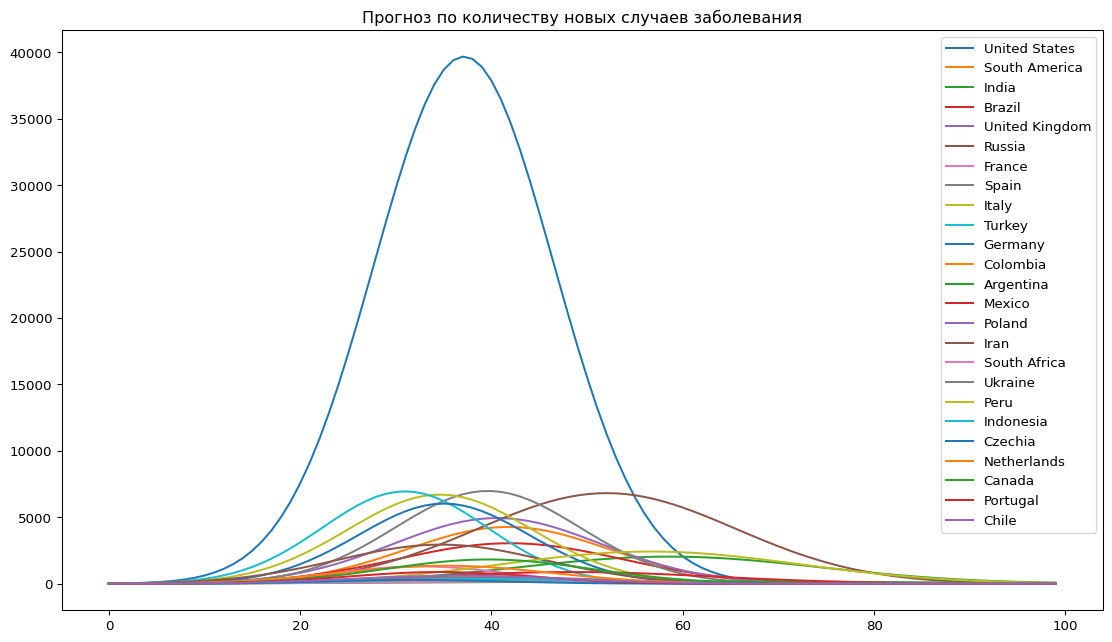

In [24]:
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(0, 100)

for country, (w0, w1, w2) in parameters[:25]:
    plt.plot(x, 
         np.exp(w0 + w1 * x + w2 * x**2), label=country)
    
plt.legend()
plt.title('Прогноз по количеству новых случаев заболевания')
plt.show()

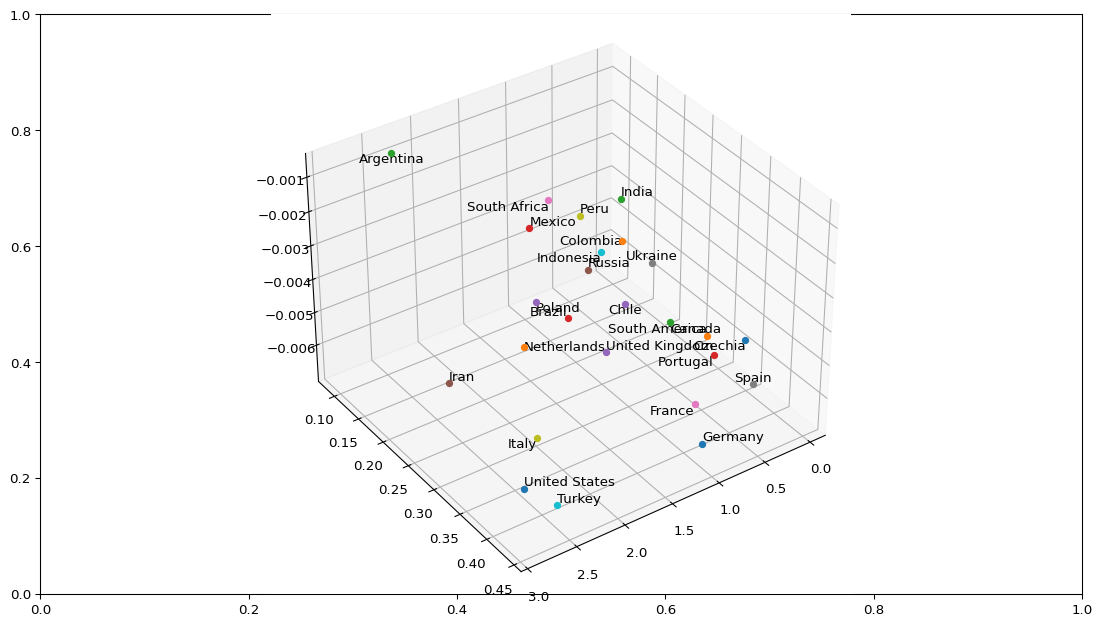

In [25]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
texts = []
for country, (w0, w1, w2) in parameters:
    ax.scatter(w0, w1, w2)
    texts.append(ax.text(w0, w1, w2, country))
adjust_text(texts);

ax.view_init(35, 55)

plt.show()

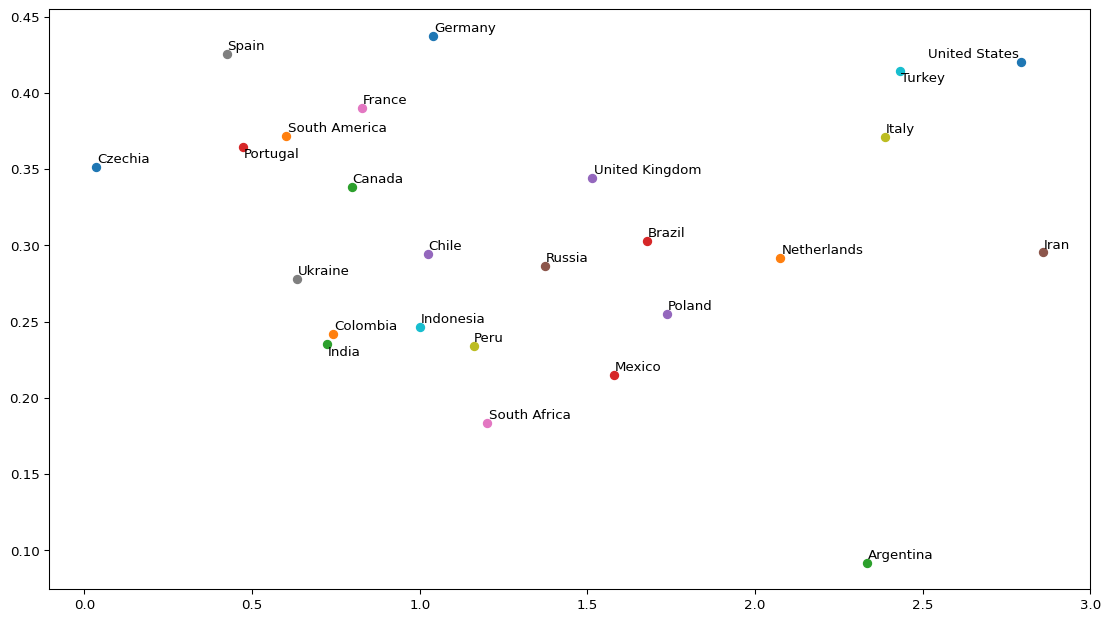

In [26]:
fig, ax = plt.subplots(figsize=(14, 8))
texts = []
for country, (w0, w1, w2) in parameters:
    ax.scatter(w0, w1)
    texts.append(ax.text(w0, w1, country))
adjust_text(texts);
plt.show()

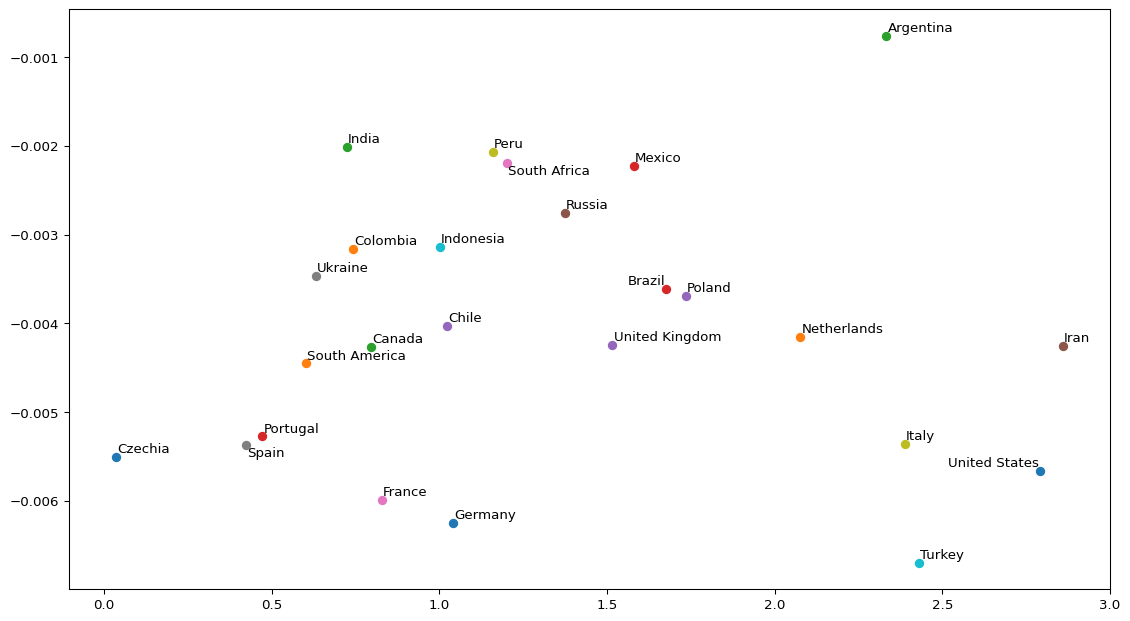

In [27]:
fig, ax = plt.subplots(figsize=(14, 8))
texts = []
for country, (w0, w1, w2) in parameters:
    ax.scatter(w0, w2)
    texts.append(ax.text(w0, w2, country))
adjust_text(texts);
plt.show()

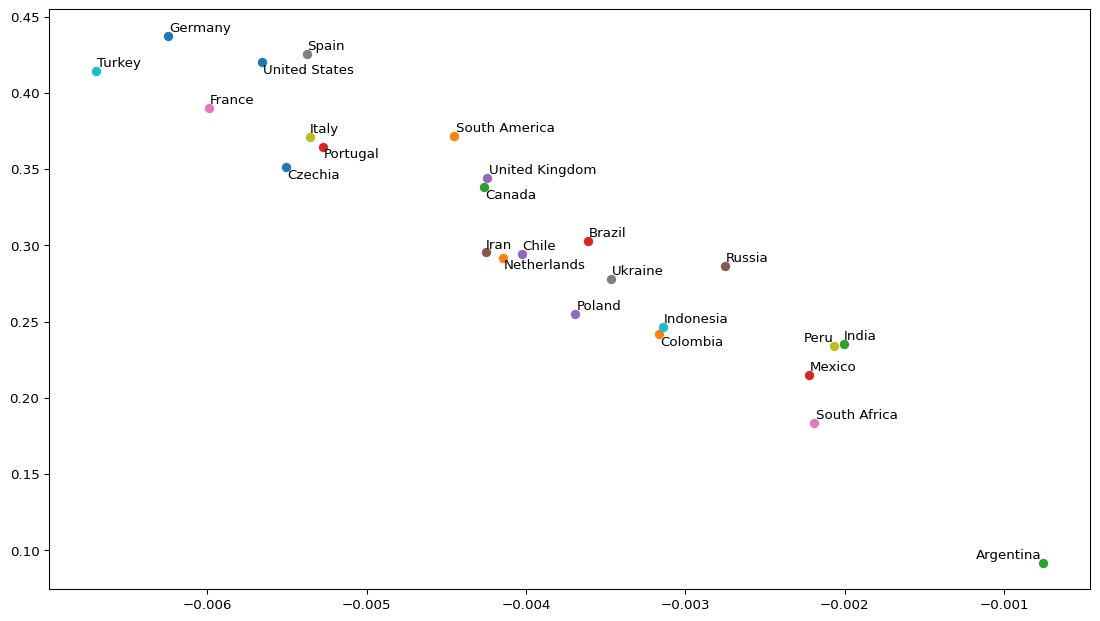

In [28]:
fig, ax = plt.subplots(figsize=(14, 8))
texts = []
for country, (w0, w1, w2) in parameters:
    ax.scatter(w2, w1)
    texts.append(ax.text(w2, w1, country))
adjust_text(texts);
plt.show()

Мы видим практически линейную зависимость между коэффициентами $w_1$ и $w_2$. Это может свидетельствовать о том, что в целом характер распространения эпидемии в разных странах примерно одинаков, отличается только темпом роста/спада заболевших.

### 5.
Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?

График из п. 3.b очень наглядно демонстрирует, что карантинные мероприятия, введенные в середине апреля, привели к снижению числа новых случаев заражения. В тоже время практически полная отмена карантина с конца лета вернула темпы распространения вируса. Но дереья не растут до небес, даже при таком, слабоконтролируемом росте, мы видим устойчивое снижение новых случаев заболевания уже с конца декабря 2020 года. Возможно сказывается коллективный иммунитет общества, который сложно получить иным образом.